In [17]:
!pip install tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 2.0 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.7 MB 2.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.7 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 2.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 2.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 2.6 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 2.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 3.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.5/1.7 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.5 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions,InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16

In [21]:
train_dir = 'train'
test_dir = 'test'
val_dir = 'valid'


class_names = sorted(os.listdir(train_dir))
print("Class names:", class_names)

Class names: ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']


In [23]:
img_size=224
batch_size=64

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


valid_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


valid_generator = valid_datagen.flow_from_directory(val_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [25]:
model = InceptionV3(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)

# Make all the layers in the pre-trained model non-trainable
for layer in model.layers:
    layer.trainable = False

# Print the model summary
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [41]:
img_size=224
batch_size=64

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


valid_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


valid_generator = valid_datagen.flow_from_directory(val_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')


Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [43]:
model = InceptionV3(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)

# Make all the layers in the pre-trained model non-trainable
for layer in model.layers:
    layer.trainable = False

# Print the model summary
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_7[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [49]:
last_layer = model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(20, activation='softmax')(x)           

model = Model(model.input, x) 

model.compile(
    optimizer=RMSprop(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()


last layer output shape:  (None, 12, 12, 768)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_7[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 122,242,996 (466.32 MB)

 Trainable params: 113,267,732 (432.08 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [51]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               verbose=1,
                               mode='max',
                               restore_best_weights=True)


# model_checkpoint = ModelCheckpoint(filepath='best_weights.h5',
#                                    monitor='val_loss',
#                                    verbose=1,
#                                    save_best_only=True,
#                                    mode='max')

In [53]:
epochs=10

history = model.fit(train_generator, epochs=epochs,batch_size=batch_size, validation_data=valid_generator, callbacks=[early_stopping])

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.5220 - loss: 1.9247 - val_accuracy: 0.9300 - val_loss: 0.2938
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9228 - loss: 0.2641 - val_accuracy: 0.9300 - val_loss: 0.2199
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.9695 - loss: 0.1250 - val_accuracy: 0.9400 - val_loss: 0.1861
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9778 - loss: 0.0730 - val_accuracy: 0.9800 - val_loss: 0.0897
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9847 - loss: 0.0593 - val_accuracy: 0.9700 - val_loss: 0.0672
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9901 - loss: 0.0332 - val_accuracy: 0.9700 - val_loss: 0.0495
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9924 - loss: 0.0268 - val_accuracy: 0.9900 - val_loss: 0.0196
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 1.0000 - v

# VISUALIZE THE LOSS AND ACCURACY CURVES

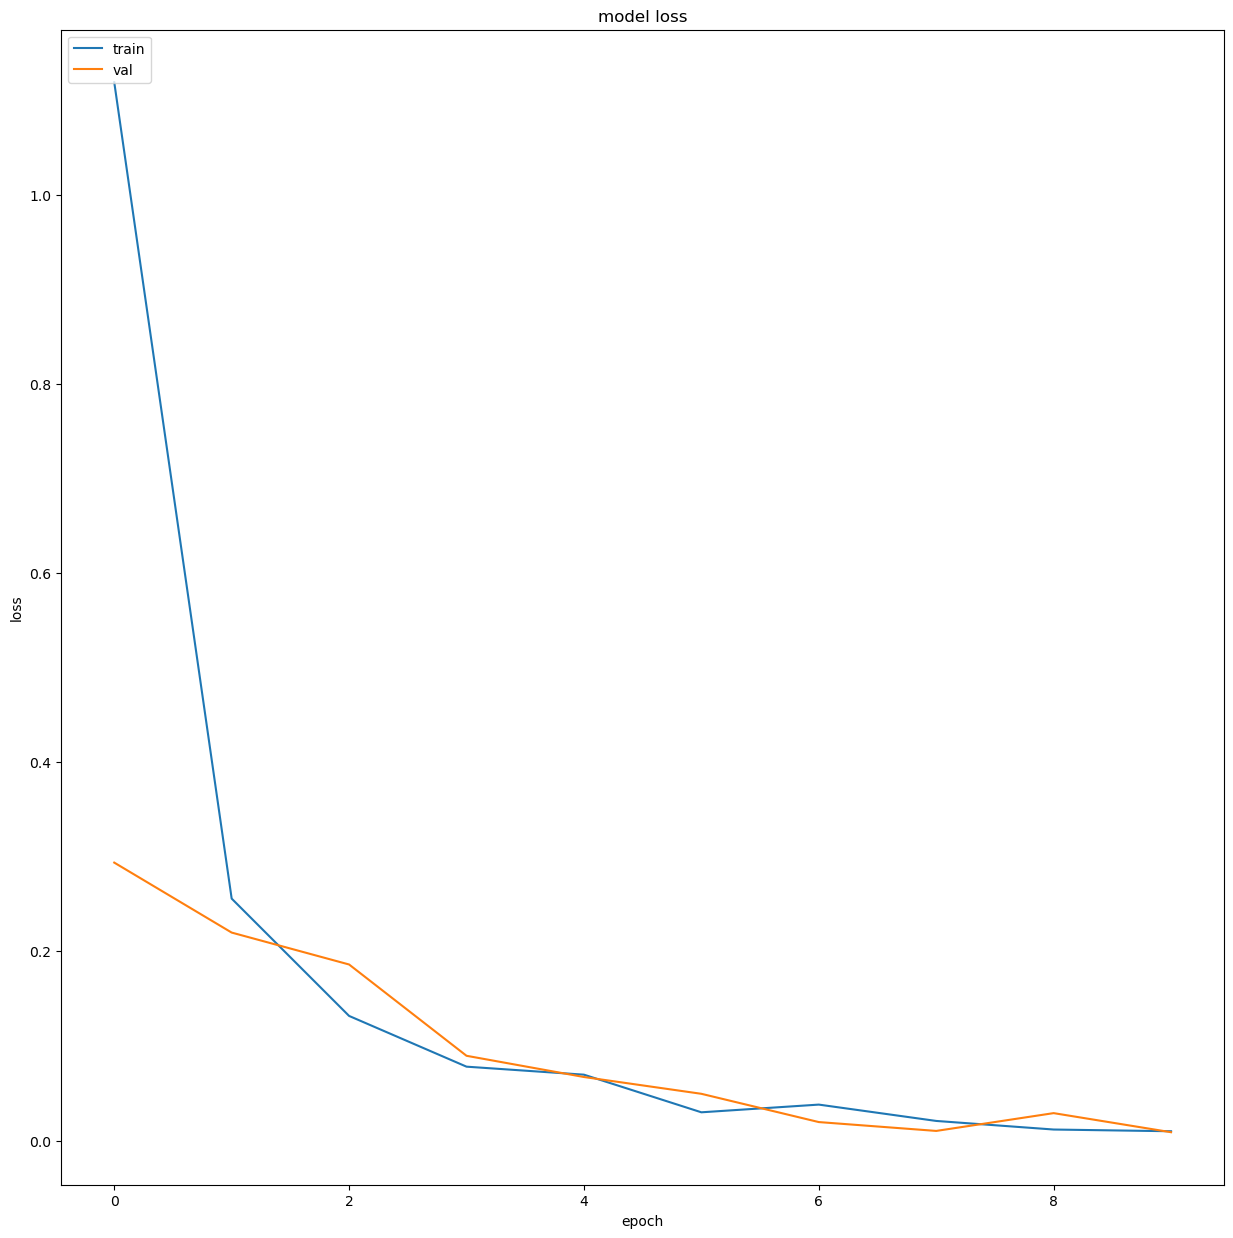

In [55]:
plt.figure(figsize=(15,15))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

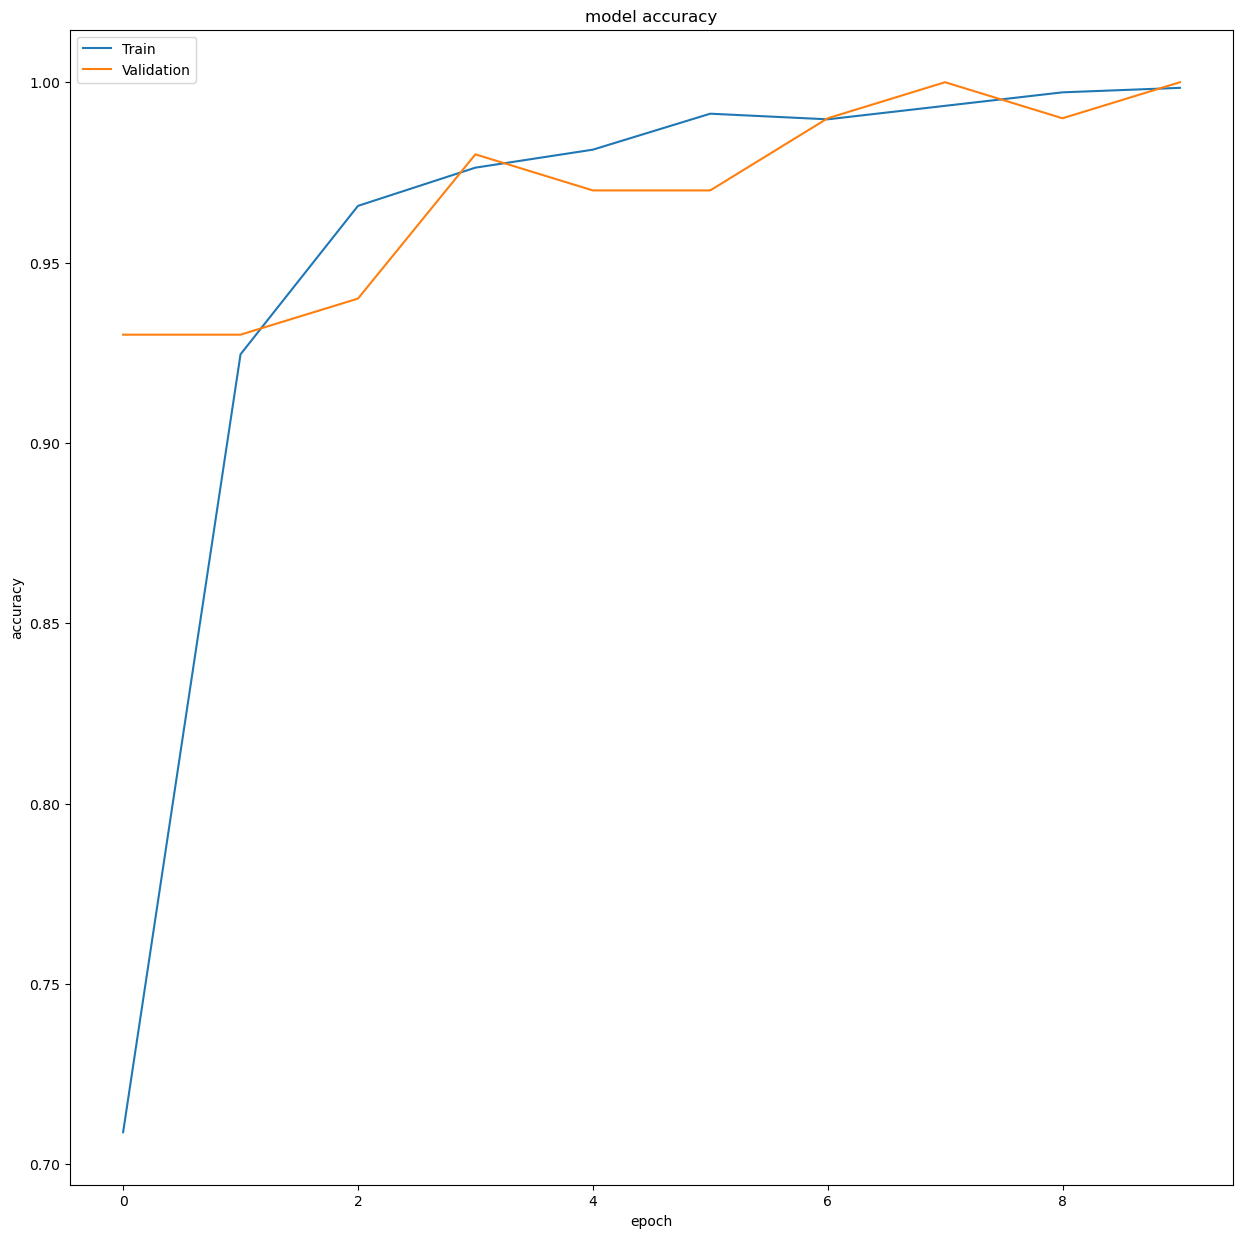

In [57]:
plt.figure(figsize=(15,15))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# SAVING THE MODEL

In [59]:
model.save('/kaggle/working/Models/model.h5')
print("saved")

saved


# MAKING THE PREDICTION

In [61]:
bird_dictionary = {
    0: 'ABBOTTS BABBLER',
    1: 'ABBOTTS BOOBY',
    2: 'ABYSSINIAN GROUND HORNBILL',
    3: 'AFRICAN CROWNED CRANE',
    4: 'AFRICAN EMERALD CUCKOO',
    5: 'AFRICAN FIREFINCH',
    6: 'AFRICAN OYSTER CATCHER',
    7: 'AFRICAN PIED HORNBILL',
    8: 'AFRICAN PYGMY GOOSE',
    9: 'ALBATROSS',
    10: 'ALBERTS TOWHEE',
    11: 'ALEXANDRINE PARAKEET',
    12: 'ALPINE CHOUGH',
    13: 'ALTAMIRA YELLOWTHROAT',
    14: 'AMERICAN AVOCET',
    15: 'AMERICAN BITTERN',
    16: 'AMERICAN COOT',
    17: 'AMERICAN FLAMINGO',
    18: 'AMERICAN GOLDFINCH',
    19: 'AMERICAN KESTREL'
}

In [63]:
img_path='images to predict/1.jpg'

In [65]:
def predict_dir(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))  
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    preprocessed_img = preprocess_input(img_array) 

    predictions = model.predict(preprocessed_img)  
    
    predicted_class_index = np.argmax(predictions)
    bird_name = bird_dictionary[predicted_class_index]
    print(bird_name)
    

In [67]:
predict_dir(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
AFRICAN CROWNED CRANE


# ANALYSE THE PERFORMANCE OF OUR MODEL TEST DIRECTORY

In [69]:
test_data_dir = 'test'

test_datagen = ImageDataGenerator(rescale=1./255)  # You can add other preprocessing options here if needed

batch_size = 32

test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224), 
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=False 
)

Found 100 images belonging to 20 classes.


In [71]:
train_evaluation = model.evaluate(train_data_augmented)
train_accuracy = train_evaluation[1]
train_loss = train_evaluation[0]


valid_evaluation = model.evaluate(valid_data)
valid_accuracy = valid_evaluation[1]
valid_loss = valid_evaluation[0]


test_evaluation = model.evaluate(test_data)
test_accuracy = test_evaluation[1]
test_loss = test_evaluation[0]

# Generate a table
from tabulate import tabulate

data = [
    ["Training", train_accuracy, train_loss],
    ["Validation", valid_accuracy, valid_loss],
    ["Test", test_accuracy, test_loss]
]

headers = ["Dataset", "Accuracy", "Loss"]

table = tabulate(data, headers=headers, tablefmt="grid")

print(table)


101/101 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.7295 - loss: 0.9921
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - accuracy: 1.0000 - loss: 0.0136
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 973ms/step - accuracy: 0.9939 - loss: 0.0231
+------------+------------+-----------+
| Dataset    |   Accuracy |      Loss |
+============+============+===========+
| Training   |    0.74813 | 0.914798  |
+------------+------------+-----------+
| Validation |    1       | 0.0102235 |
+------------+------------+-----------+
| Test       |    0.99    | 0.0251717 |
+------------+------------+-----------+


In [73]:
test_data.classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19])

In [75]:
test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step 


In [77]:
test_predictions

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
        0, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19],
      dtype=int64)

<Axes: >

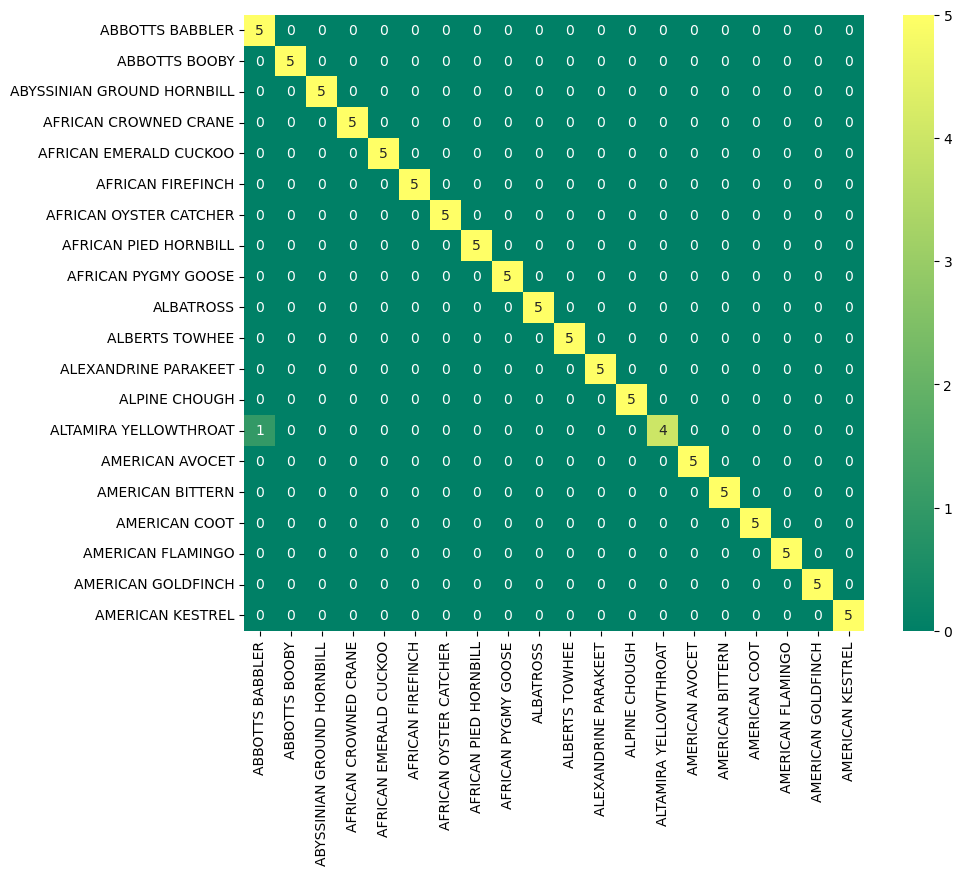

In [79]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = test_data.classes
y_pred = test_predictions
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())

# Use the model to predict for the given test images

In [81]:
def predict_images(directory):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory)]
    num_images = len(image_paths)
    
    images = []
    predictions = []
    
    for image_path in image_paths:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.image.resize(image, (224, 224))
        image = image / 255.0
        images.append(image)
    
    images = np.array(images)
    
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    plt.figure(figsize = (20,20))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(classes[predicted_classes[i]])
        plt.axis(False)
        
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


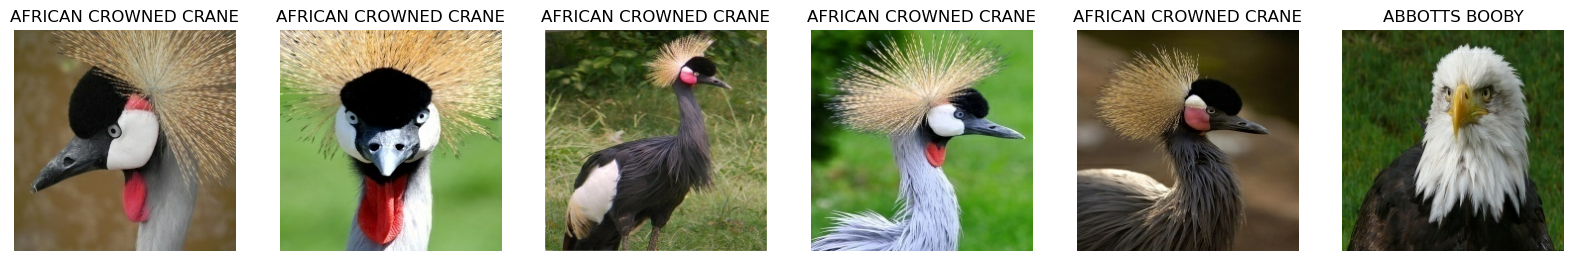

In [83]:
predict_images('images to predict')

In [85]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_7[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 235,510,730 (898.40 MB)

 Trainable params: 113,267,732 (432.08 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

 Optimizer params: 113,267,734 (432.08 MB)